In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam

In [2]:
data=pd.read_csv("diamond.csv")
data.head()

,Carat Weight,Cut,Color,Clarity,Polish,Symmetry,Report,Price
0,1.10,Ideal,H,SI1,VG,EX,GIA,5169
1,0.83,Ideal,H,VS1,ID,ID,AGSL,3470
2,0.85,Ideal,H,SI1,EX,EX,GIA,3183
3,0.91,Ideal,E,SI1,VG,VG,GIA,4370
4,0.83,Ideal,G,SI1,EX,EX,GIA,3171


In [3]:
data.duplicated().sum()

83

In [4]:
data=data.drop_duplicates()

In [5]:
data.isnull().sum()

Carat Weight    0
Cut             0
Color           0
Clarity         0
Polish          0
Symmetry        0
Report          0
Price           0
dtype: int64

In [6]:
data.dtypes

Carat Weight    float64
Cut              object
Color            object
Clarity          object
Polish           object
Symmetry         object
Report           object
Price             int64
dtype: object

In [7]:
Cut=LabelEncoder()
data["Cut"]=Cut.fit_transform(data["Cut"])
Color=LabelEncoder()
data["Color"]=Color.fit_transform(data["Color"])
Clarity=LabelEncoder()
data["Clarity"]=Clarity.fit_transform(data["Clarity"])
Polish=LabelEncoder()
data["Polish"]=Polish.fit_transform(data["Polish"])
Symmetry=LabelEncoder()
data["Symmetry"]=Symmetry.fit_transform(data["Symmetry"])
Report=LabelEncoder()
data["Report"]=Report.fit_transform(data["Report"])

In [8]:
data.dtypes

Carat Weight    float64
Cut               int32
Color             int32
Clarity           int32
Polish            int32
Symmetry          int32
Report            int32
Price             int64
dtype: object

In [9]:
x=data.drop("Price",axis=1)
y=data["Price"]

In [10]:
x.shape,y.shape

((5917, 7), (5917,))

In [11]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=23)

In [12]:
x_train.shape

(4437, 7)

In [13]:
model=Sequential()
model.add(Dense(50,input_dim=7,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(200,activation="relu"))
model.add(Dense(50,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(100,activation="relu"))
model.add(Dense(1,activation="relu"))

callbacks=tf.keras.callbacks.EarlyStopping(monitor="loss",patience=10)
model.compile(loss="mse",optimizer=Adam(learning_rate=0.001))
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                400       
                                                                 
 dense_1 (Dense)             (None, 100)               5100      
                                                                 
 dense_2 (Dense)             (None, 200)               20200     
                                                                 
 dense_3 (Dense)             (None, 50)                10050     
                                                                 
 dense_4 (Dense)             (None, 100)               5100      
                                                                 
 dense_5 (Dense)             (None, 100)               10100     
                                                                 
 dense_6 (Dense)             (None, 1)                 

In [14]:
training_info=model.fit(x_train,y_train,batch_size=500,epochs=200,validation_data=(x_test,y_test),callbacks=callbacks)

Epoch 1/200

9/9 [==============================] - 3s 51ms/step - loss: 238809760.0000 - val_loss: 258395520.0000
Epoch 2/200
9/9 [==============================] - 0s 15ms/step - loss: 238572320.0000 - val_loss: 257865856.0000
Epoch 3/200
9/9 [==============================] - 0s 14ms/step - loss: 237501984.0000 - val_loss: 255536096.0000
Epoch 4/200
9/9 [==============================] - 0s 13ms/step - loss: 232959824.0000 - val_loss: 246163360.0000
Epoch 5/200
9/9 [==============================] - 0s 15ms/step - loss: 216250368.0000 - val_loss: 213963136.0000
Epoch 6/200
9/9 [==============================] - 0s 15ms/step - loss: 167215536.0000 - val_loss: 139320624.0000
Epoch 7/200
9/9 [==============================] - 0s 15ms/step - loss: 114389496.0000 - val_loss: 124563696.0000
Epoch 8/200
9/9 [==============================] - 0s 16ms/step - loss: 109367952.0000 - val_loss: 114688488.0000
Epoch 9/200
9/9 [==============================] - 0s 14ms/step - loss: 104976320.0000 

In [15]:
hist=training_info.history

<function matplotlib.pyplot.legend(*args, **kwargs) -> 'Legend'>

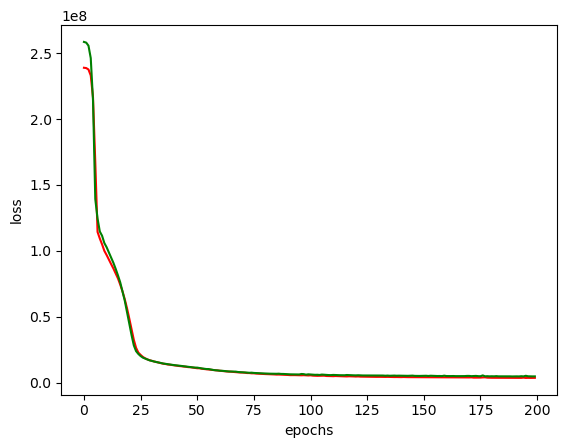

In [16]:
plt.plot(hist["loss"],label="training loss",color="red")
plt.plot(hist["val_loss"],label="validation_loss",color="green")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend